## Basic sentiment analysis of user reviews

In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob 

df=pd.read_csv('googleplaystore_user_reviews_1.csv')
df_1 = pd.read_csv('googleplaystore.csv')

In [96]:
def get_pos_neg_words():
    def get_words(url):
        import requests
        words = requests.get(url).content.decode('latin-1')
        word_list = words.split('\n')
        index = 0
        while index < len(word_list):
            word = word_list[index]
            if ';' in word or not word:
                word_list.pop(index)
            else: 
                index+=1
        return word_list

    #Get lists of positive and negative words
    p_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
    n_url = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'
    positive_words = get_words(p_url)
    negative_words = get_words(n_url)
    return positive_words,negative_words

positive_words,negative_words = get_pos_neg_words()


<li> Transfer reviews into list

In [2]:
app_review = np.array(df['Translated_Review'])
app_review = app_review.tolist()


<li> Use textblob to do sentiment analysis
 

In [4]:
def get_sentiment_polarity(text):
    r= TextBlob(text).sentiment.polarity
    w = TextBlob(text).sentiment.subjectivity
    if r > 0:
        s = 'Positive'
    elif r == 0:
        s = 'Neutral'
    else:
        s = 'Negative'
    return (s,r,w)



In [5]:
sentiment=[]
sentiment_polarity=[]
sentiment_subjectivity=[]
for i in app_review:
    if isinstance(i,str):
        e = get_sentiment_polarity(i)
        sentiment.append(e[0])
        sentiment_polarity.append(e[1])
        sentiment_subjectivity.append(e[2])
    else:
        sentiment.append(i)
        sentiment_polarity.append(i)
        sentiment_subjectivity.append(i)

<li>Add sentiment, sentiment_polarity and sentiment_subjectivity to df

In [6]:
df['Sentiment'] = pd.DataFrame(sentiment)
df['Sentiment_polarity'] = pd.DataFrame(sentiment_polarity)
df['Sentiment_subjectivity']= pd.DataFrame(sentiment_subjectivity)

In [7]:
df

,App,Translated_Review,Sentiment,Sentiment_polarity,Sentiment_subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000


### Draw sentiment graph

In [15]:
import plotly
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})



In [16]:
df_2 = pd.merge(df_1, df, on = "App", how = "inner")
df_2 = df_2.dropna(subset=['Sentiment', 'Translated_Review'])
grouped_sentiment_count = df_2.groupby(['Category', 'Sentiment']).agg({'App': 'count'}).reset_index()
grouped_sentiment_sum = df_2.groupby(['Category']).agg({'Sentiment': 'count'}).reset_index()
new_df = pd.merge(grouped_sentiment_count, grouped_sentiment_sum, on=["Category"])

new_df['Sentiment_Normalized'] = new_df.App/new_df.Sentiment_y
new_df = new_df.groupby('Category').filter(lambda x: len(x) ==3)

trace1 = go.Bar(
    x=list(new_df.Category[::3]),
    y= new_df.Sentiment_Normalized[::3],
    name='Negative',
    marker=dict(color = 'rgb(158,202,225)')
)

trace2 = go.Bar(
    x=list(new_df.Category[::3]),
    y= new_df.Sentiment_Normalized[1::3],
    name='Neutral',
    marker=dict(color = 'rgb(49,130,189)')
)

trace3 = go.Bar(
    x=list(new_df.Category[::3]),
    y= new_df.Sentiment_Normalized[2::3],
    name='Positive',
    marker=dict(color = 'rgb(8,48,107)')
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    title = 'Sentiment analysis',
    barmode='stack',
    xaxis = {'tickangle': -45},
    yaxis = {'title': 'Fraction of reviews'}
)

fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot({'data': data, 'layout': layout})

<b> CONCLUSION</b>
<li> According to the graph above, <b>Comics </b> apps perform the best, having about 90% positive review.
<li> On the other hand, <b>Game</b> apps perform most terrible, with about 50% positive and 50% negative and neutral.

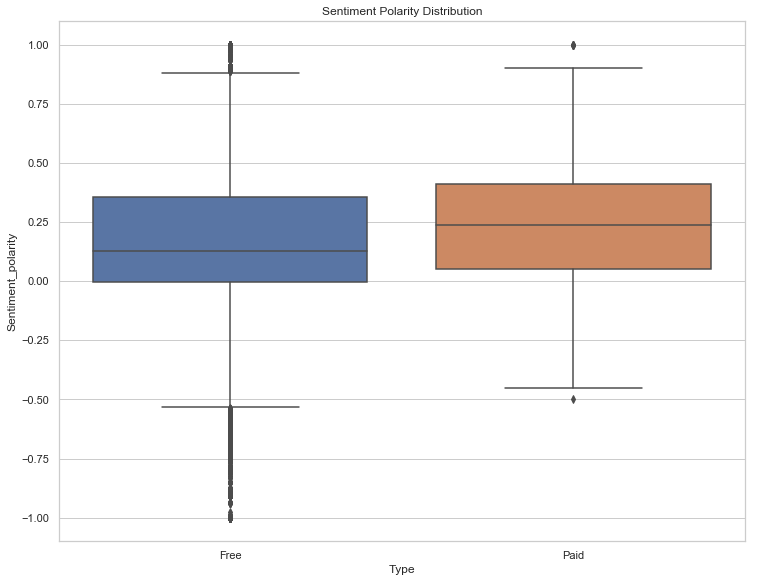

In [105]:
sns.set_style('ticks',{"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12.3, 9.57)
ax = sns.boxplot(x='Type', y='Sentiment_polarity', data=df_2)
title = ax.set_title('Sentiment Polarity Distribution')

<b> CONCLUSION</b>
<li> Free apps received much more extreme comments which are indicated as the outliers on the negative Y-axis.
<li> Paid apps reveived more tolerent and moderate reviews - people will not give extreme comments to the paid apps.

### Generate wordcloud

In [14]:
from wordcloud import WordCloud, STOPWORDS


from nltk.corpus import stopwords
stop = STOPWORDS
# stop = stop.update('app', 'APP' ,'ap', 'App', 'apps', 'application', 'browser', 'website', 'websites', 'chrome', 'click', 'web', 'ip', 'address',
#             'files', 'android', 'browse', 'service', 'use', 'one', 'download', 'email', 'Launcher')

wc = WordCloud(background_color="white", max_words=2000, stopwords=stop, colormap="Set2")

df_2.Translated_Review = df_2.Translated_Review.apply(lambda x: x if 'app' not in x.split(' ') else np.nan)
df_2.dropna(subset=['Translated_Review'], inplace=True)


<li><b>The wordcloud of free apps

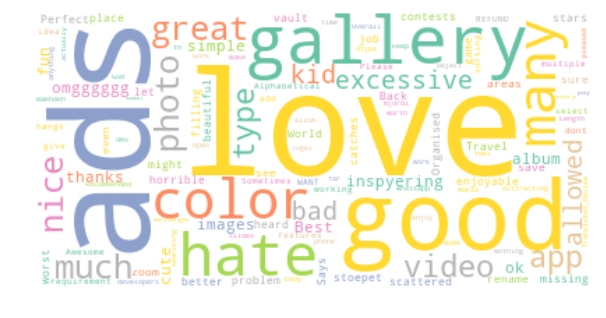

In [15]:
free = df_2.loc[df_2.Type=='Free']['Translated_Review'].apply(lambda x: '' if x=='nan' else x)
wc.generate(''.join(str(free)))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<b> CONCLUSION OF FREE APPS</b>
<li> Positive words: love, good, great
<li> Negative words: ads, hate, bad

<li><b>The workdcloud of paid apps

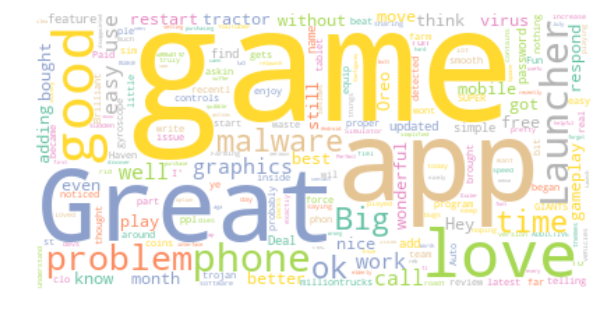

In [16]:
paid = df_2.loc[df_2.Type=='Paid']['Translated_Review'].apply(lambda x: '' if x=='nan' else x)
wc.generate(''.join(str(paid)))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<b> CONCLUSION OF PAIED APPS</b>
<li> Positive words: great, love, good
<li> Negative words: problem, malware

## Topic analysis

### Import for topic analysis

In [8]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import pprint
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk import sent_tokenize,word_tokenize 
from nltk.book import *
import gensim.summarization
import matplotlib.pyplot as plt
import seaborn as sns
import gc

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


### Delete the rows having NaN and build topic_graph function

In [9]:
df_new = df.dropna(axis=0, how='any')
df_new.reset_index(inplace =True)

In [10]:
def topic_graph(df):
    reviews_list = []
    for i in range(len(df)):
        r = df['Translated_Review'][i]
        reviews_list.append(r)
    for i in range(len(reviews_list)):
        review = reviews_list[i]
        sents = sent_tokenize(review)
    for j in range(len(sents)):
        sent = sents[j]
        sent = sent.strip().replace('\n','')
        sents[j] = sent
    reviews_list[i] = '. '.join(sents)
    
    texts = [[word for word in review.lower().split()
        if word not in STOPWORDS and word.isalnum() and not word.lower() == 'slate']  #remove numbers and not words
        for review in reviews_list]
    dictionary = corpora.Dictionary(texts) #(word_id,frequency) pairs
    corpus = [dictionary.doc2bow(text) for text in texts] #(word_id,freq) pairs by sentence
    num_topics = 1 #The number of topics that should be generated
    passes = 10
    lda = LdaModel(corpus,
                  id2word=dictionary,
                  num_topics=num_topics,
                  passes=passes)

    tp = lda.top_topics(corpus,topn=5,dictionary=dictionary)
    return tp

#### Graphing the top apps from the top 5 categories.

<li> Choose the best performing apps in the top 5 best performing categories.

In [17]:
category_list = ['EDUCATION', 'ART_AND_DESIGN', 'ENTERTAINMENT','GAME','COMICS']

app_list=[]
for i in category_list:
    x = df_2[df_2['Category']==i].sort_values(by = ['Rating'], ascending = False)
    r = np.array(x[0:1]).tolist()
    app_list.append((i,r[0][0]))



In [11]:
df_edu = df_new[df_new['App']=='Duolingo: Learn Languages Free']
df_edu.reset_index(inplace =True)
df_art = df_new[df_new['App']=='Colorfit - Drawing & Coloring']
df_art.reset_index(inplace =True)
df_enter=df_new[df_new['App']=='Fandango Movies - Times + Tickets']
df_enter.reset_index(inplace =True)
df_game=df_new[df_new['App']=='Bowmasters']
df_game.reset_index(inplace =True)
df_comics = df_new[df_new['App']=='Best Wallpapers Backgrounds(100,000+ 4K HD)']
df_comics.reset_index(inplace =True)
df_list = []
df_list.append(df_edu)
df_list.append(df_art)
df_list.append(df_enter)
df_list.append(df_game)
df_list.append(df_comics)

In [12]:
results = []
for w in df_list:
    result = topic_graph(w)
    results.append(result)

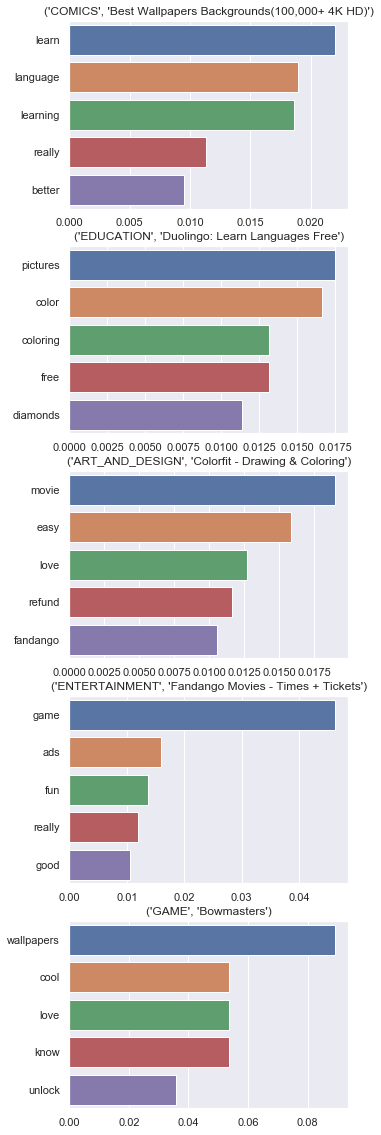

In [38]:
f,ax = plt.subplots(5,1,figsize = (5,20))

for i in range(5):
# sns.barplot(label,value,palette='RdBu_r', ax=ax1)
    ax[i].set_title(app_list[i-1])
    label = [] 
    value = []
    for j,k in results[i][0][0]:
        label.append(j)
        value.append(k)
    sns.barplot(label,value, ax= ax[i]);